### Abduction example

We will be abducing the cause of ["headache relief", "pill swallowed"] from the set of possible causes {"took aspirin", "headache naturally disappeared", "took cyanide pill"}

### Prior confidence bounds for each case
How common are the following events in the time frame we are abducing (in general)
$$0.10 \le \Pr(\text{taking aspirin}) \le 0.15$$ 
$$0.05 \le \Pr(\text{placebo/headache disappearing on its own}) \le 0.07$$
$$0 \le \Pr(\text{ingesting cyanide}) \le 0.0002$$



In [132]:
aspirin_prior_u = 0.4#3
aspirin_prior_l = 0.2

nothing_prior_u = 0.7#40
nothing_prior_l = 0.15

cyanide_prior_u = 0.002
cyanide_prior_l = 0



### Likelihood PMFs upper/lower bounds for each cause
---> pill taken (yes, no) x- axis




In [133]:
import numpy as np


aspirin_likelihood_u = np.array([[0.725,0.125], # (pill taken, headache relieved) | (no pill taken, headache relieved)
                                 [0.175, 0.075]])    # (pill taken, no headache relieved) | (no pill taken, no headache relieved)
aspirin_likelihood_l = np.array([[0.675,0.075],
                        [0.125, 0.025]])


nothing_likelihood_u = np.array([[0.05, 0.3],
                        [0.05, 0.8]])
nothing_likelihood_l = np.array([[0.001, 0.2],
                        [0.002, 0.7]])


cyanide_likelihood_u = np.array([[0.99,0.01],
                        [0,0]])
cyanide_likelihood_l = np.array([[0.98, 0.005],
                        [0,0]])



Posterior distributions

In [135]:
aspirin_posterior_u = aspirin_prior_u*aspirin_likelihood_u
aspirin_posterior_l = aspirin_prior_l*aspirin_likelihood_l
print(aspirin_posterior_u)
print(aspirin_posterior_l)



[[0.29 0.05]
 [0.07 0.03]]
[[0.135 0.015]
 [0.025 0.005]]


In [136]:
nothing_posterior_u = nothing_prior_u*nothing_likelihood_u
nothing_posterior_l = nothing_prior_l*nothing_likelihood_l
print(nothing_posterior_u)
print(nothing_posterior_l)

[[0.035 0.21 ]
 [0.035 0.56 ]]
[[0.00015 0.03   ]
 [0.0003  0.105  ]]


In [137]:
cyanide_posterior_u = cyanide_prior_u*cyanide_likelihood_u
cyanide_posterior_l = cyanide_prior_l*cyanide_likelihood_l
print(cyanide_posterior_u)
print(cyanide_posterior_l)

[[1.98e-03 2.00e-05]
 [0.00e+00 0.00e+00]]
[[0. 0.]
 [0. 0.]]


Consider the observation (pill taken (0), headache is not relieved (1)). Our posterior bounds are overlapping as follows.

In [138]:
# choose observation vector
pill_taken = True
headache_relieved = False

In [139]:
pill_i = 0 if pill_taken else 1
headache_i = 0 if headache_relieved else 1

In [242]:
# Define the variables (skipping for time)
a1, a2 =  0.23, 0.30 # aspirin
b1, b2 = 0.15,0.25 # placebo
c1, c2 = 0,0.002 # cyanide
d1, d2 = 0.2,0.4 # caffiene

# Define the confidence bounds (as the height of the confidence interval)
ci_a = 0.3
ci_b = 0.3
ci_c = 0.3
ci_d = 0.3

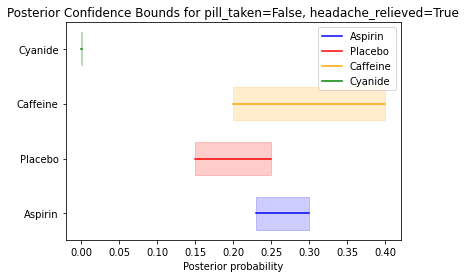

In [244]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first horizontal line (stick) with confidence interval
ax.plot([a1, a2], [1, 1], label='Aspirin', color='blue')
ax.fill_betweenx([1 - ci_a, 1 + ci_a], a1, a2, color='blue', alpha=0.2)

# Plot the second horizontal line (stick) with confidence interval
ax.plot([b1, b2], [2, 2], label='Placebo', color='red')
ax.fill_betweenx([2 - ci_b, 2 + ci_b], b1, b2, color='red', alpha=0.2)



# Plot the third horizontal line (stick) with confidence interval
ax.plot([d1, d2], [3, 3], label='Caffeine', color='orange')
ax.fill_betweenx([3 - ci_d, 3 + ci_d], d1, d2, color='orange', alpha=0.2)

# Plot the third horizontal line (stick) with confidence interval
ax.plot([c1, c2], [4, 4], label='Cyanide', color='green')
ax.fill_betweenx([4 - ci_c, 4 + ci_c], c1, c2, color='green', alpha=0.2)




# Add labels and title
ax.set_xlabel('Posterior probability')
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['Aspirin', 'Placebo', 'Caffeine', 'Cyanide'])
ax.set_title(f'Posterior Confidence Bounds for pill_taken={pill_taken}, headache_relieved={headache_relieved}')

# Add a legend
ax.legend()

# Show the plot
plt.show()


At this step, we assume each possibility lies in their $q$-percent confidence interval, the bound of the maximum posterior is [0.23, 0.4] (left side of the orange bound to the right side of the red bound).

### Finding $\Pr(IsMax(M_i))$

Let $\mathcal M' \subseteq \mathcal M$ denote the set of posteriors whose confidence intervals intersect with $[l,u]$. The probability that $M_i \in \mathcal M'$ is the maximum posterior is as follows:
            $$\Pr( IsMax(M_i)) =
            \int_{l}^{u} {\Pr\left(M_i = x, \bigcap_{\substack{M_j \in \mathcal M',\\ C_j\neq C_i}}{(M_j<x)}\right)}dx. $$

Let $y$ and $z$ represent the other two posterior values. The positions of these posteriors is not independent. For $M_i = x$ to be the maximum posterior must ensure that (1) $1-(x+y+z) < x$, so that posterior of $C_{other}$ (the remaining cause posterior) is not maximum, and (2) $x+y+z < 1$. I think the solution here is to integrate over a joint pdf. The question is how to form that pdf while having it still sum to 1.

### Shortcut Attempt at $\Pr(IsMax(M_i))$ by assuming independence
This produced weird probabilities

In [237]:
# pdfs of each
aspirin_pdf = lambda x: 1/(0.25-0.15) 
placebo_pdf = lambda x: 1/(0.4-0.2)
caffeine_pdf = lambda x: 1/(0.30-0.23)

In [235]:
l = 0.23
u = 0.4


# choose other two 
def prob_max_approx(x, choice): # quick and dirty method without multivariable integration
    # if x > 0.30: return 0
    prob_caffeine_lower, prob_placebo_lower, prob_aspirin_lower = 1,1,1

    if choice != "caffeine":
        prob_caffeine_lower = 1 if x > 0.3 else (x-0.23)/(0.30-0.23)
    # print("prob caffeine", prob_caffeine_lower)
    if choice != "placebo":
        prob_placebo_lower = 1 if x > 0.4 else (x-0.2)/(0.4-0.2)
    # print("prob placebo lower", prob_placebo_lower)

    if choice != "aspirin":
        prob_aspirin_lower = 1 if x > 0.25 else (x-0.15)/(0.25-0.15)
    # print("proba aspirin lower", prob_aspirin_lower)

    return (prob_aspirin_lower*prob_placebo_lower*prob_caffeine_lower)#/(u-l)

In [245]:
prob_max_approx(0.29, "aspirin")

0.3857142857142855

probability max of placebo

In [246]:
from scipy import integrate

result, error = integrate.quad(lambda x: prob_max_approx(x, "aspirin"), l, u)

result

0.08841666666659963

probability maximum posterior of aspirin

In [232]:
result, error = integrate.quad(lambda x: prob_max_approx(x, "aspirin"), l, u)
result

0.08841666666659963

In [234]:
result, error = integrate.quad(lambda x: prob_max_approx(x, "caffeine"), l, u)
result

0.09738333241084063

In [182]:
error

7.843131810680859e-09

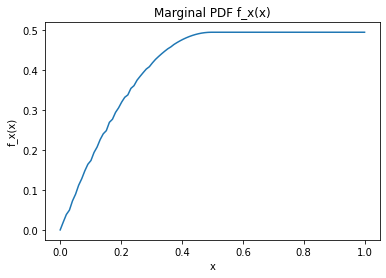

In [238]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Define individual PDFs f_x(x), f_y(y), f_z(z)
def f_x(x):
    # Define your PDF for x here
    return 1.0  # Placeholder

def f_y(y):
    # Define your PDF for y here
    return 1.0  # Placeholder

def f_z(z):
    # Define your PDF for z here
    return 1.0  # Placeholder

# Define the joint PDF f_{xyz}(x, y, z)
def f_xyz(x, y, z):
    # Assuming a simple form for illustration
    return f_x(x) * conditional_pdf_yz(y, z, x)

# Define the conditional PDF f_{y,z}(y, z | x)
def conditional_pdf_yz(y, z, x):
    # Define the conditional PDF of y and z given x
    if 1 - 2*x < y + z < 1:
        # Return the conditional PDF
        return 1.0  # Placeholder
    else:
        return 0.0

# Define the valid range for x, y, z
x_range = np.linspace(0, 1, 100)
y_range = np.linspace(0, 1, 100)
z_range = np.linspace(0, 1, 100)

# Calculate the joint PDF over the valid ranges
joint_pdf = np.zeros((len(x_range), len(y_range), len(z_range)))
for i, x in enumerate(x_range):
    for j, y in enumerate(y_range):
        for k, z in enumerate(z_range):
            joint_pdf[i, j, k] = f_xyz(x, y, z)

# Plotting
# Visualize the joint PDF (e.g., marginalize over y and z)
marginal_x = np.trapz(np.trapz(joint_pdf, y_range, axis=1), z_range, axis=1)

plt.plot(x_range, marginal_x)
plt.xlabel('x')
plt.ylabel('f_x(x)')
plt.title('Marginal PDF f_x(x)')
plt.show()